In [23]:
#!/usr/bin/env python3
"""
Алгоритма Нидлмана-Вунша.
"""

import time
import os


def clear_screen():
    """Очищает экран"""
    os.system('clear' if os.name == 'posix' else 'cls')


def print_matrix(seq1, seq2, dp, current_i=None, current_j=None, step_info=""):
    """
    Печатает матрицу с анимацией текущей ячейки
    """
    clear_screen()
    
    print("=" * 70)
    print("АЛГОРИТМ НИДЛМАНА-ВУНША - ПОШАГОВОЕ ЗАПОЛНЕНИЕ")
    print("=" * 70)
    print(f"Seq1: {seq1}")
    print(f"Seq2: {seq2}")
    if step_info:
        print(f"Шаг: {step_info}")
    print()
    
    # Заголовок
    print("     ", end="")
    for j in range(len(dp[0])):
        if j == 0:
            print("   ", end="")
        else:
            print(f"  {seq2[j-1]}", end="")
    print()
    
    # Строки матрицы
    for i in range(len(dp)):
        if i == 0:
            print("   ", end="")
        else:
            print(f" {seq1[i-1]} ", end="")
        
        for j in range(len(dp[0])):
            # Выделяем текущую ячейку
            if current_i == i and current_j == j:
                print(f"[{dp[i][j]:2}]", end="")
            else:
                print(f" {dp[i][j]:2} ", end="")
        print()
    
    print("=" * 70)


def needleman_wunsch(seq1, seq2, match=2, mismatch=-1, gap=0):
    """
    Алгоритма Нидлмана-Вунша
    """
    n, m = len(seq1), len(seq2)
    

    dp = [[0] * (m+1) for _ in range(n+1)]
    
    for i in range(n+1):
        dp[i][0] = i * gap
    for j in range(m+1):
        dp[0][j] = j * gap
    
    print_matrix(seq1, seq2, dp, step_info="Инициализация")
    time.sleep(2)
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            print_matrix(seq1, seq2, dp, current_i=i, current_j=j, 
                                step_info=f"Заполнение ячейки ({i},{j})")
            
            match_score = dp[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch)
            delete = dp[i-1][j] + gap
            insert = dp[i][j-1] + gap
            
            print(f"\nРасчет для {seq1[i-1]} vs {seq2[j-1]}:")
            print(f"↖ Совпадение: {dp[i-1][j-1]} + {match if seq1[i-1] == seq2[j-1] else '-1'} = {match_score}")
            print(f"↑ Удаление:   {dp[i-1][j]} + {gap} = {delete}")
            print(f"← Вставка:    {dp[i][j-1]} + {gap} = {insert}")
            
            dp[i][j] = max(match_score, delete, insert)
            
            print(f"Максимум: {dp[i][j]}")
            time.sleep(1.5)
    
    print_matrix(seq1, seq2, dp, step_info="Матрица заполнена")
    time.sleep(2)
    
    align1, align2 = "", ""
    i, j = n, m
    
    print("\nОБРАТНЫЙ ПРОХОД:")
    print("=" * 50)
    
    step = 1
    while i > 0 or j > 0:
        print(f"\nШаг {step}: Позиция ({i},{j})")
        
        if i > 0 and j > 0 and dp[i][j] == dp[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch):
            print(f"  ↖ Совпадение: {seq1[i-1]} = {seq2[j-1]}")
            align1 = seq1[i-1] + align1
            align2 = seq2[j-1] + align2
            i -= 1
            j -= 1
        elif i > 0 and dp[i][j] == dp[i-1][j] + gap:
            print(f"  ↑ Удаление: {seq1[i-1]} → -")
            align1 = seq1[i-1] + align1
            align2 = "-" + align2
            i -= 1
        else:
            print(f"  ← Вставка: - ← {seq2[j-1]}")
            align1 = "-" + align1
            align2 = seq2[j-1] + align2
            j -= 1
        
        print(f"  Выравнивание: {align1}")
        print(f"                {align2}")
        
        step += 1
        time.sleep(1)
    
    return align1, align2, dp


def main():
    """
    Демонстрация алгоритма
    """
    # Ваши последовательности
    seq1 = "GCATGCG"
    seq2 = "GATTACA"
    
    print("АЛГОРИТМ НИДЛМАНА-ВУНША")
    print("=" * 70)
    print(f"Последовательность 1: {seq1}")
    print(f"Последовательность 2: {seq2}")
    print("Параметры: match=2, mismatch=-1, gap=-1")
    print()
    
    result1, result2, matrix = needleman_wunsch(seq1, seq2)
    
    print("\n" + "=" * 70)
    print("ФИНАЛЬНЫЙ РЕЗУЛЬТАТ:")
    print("=" * 70)
    print(f"Выравнивание 1: {result1}")
    print(f"Выравнивание 2: {result2}")
    print(f"Общий score: {matrix[len(seq1)][len(seq2)]}")


if __name__ == "__main__":
    main()


АЛГОРИТМ НИДЛМАНА-ВУНША
Последовательность 1: GCATGCG
Последовательность 2: GATTACA
Параметры: match=2, mismatch=-1, gap=-1

АЛГОРИТМ НИДЛМАНА-ВУНША - ПОШАГОВОЕ ЗАПОЛНЕНИЕ
Seq1: GCATGCG
Seq2: GATTACA
Шаг: Инициализация

          G  A  T  T  A  C  A
     0   0   0   0   0   0   0   0 
 G   0   0   0   0   0   0   0   0 
 C   0   0   0   0   0   0   0   0 
 A   0   0   0   0   0   0   0   0 
 T   0   0   0   0   0   0   0   0 
 G   0   0   0   0   0   0   0   0 
 C   0   0   0   0   0   0   0   0 
 G   0   0   0   0   0   0   0   0 
АЛГОРИТМ НИДЛМАНА-ВУНША - ПОШАГОВОЕ ЗАПОЛНЕНИЕ
Seq1: GCATGCG
Seq2: GATTACA
Шаг: Заполнение ячейки (1,1)

          G  A  T  T  A  C  A
     0   0   0   0   0   0   0   0 
 G   0 [ 0]  0   0   0   0   0   0 
 C   0   0   0   0   0   0   0   0 
 A   0   0   0   0   0   0   0   0 
 T   0   0   0   0   0   0   0   0 
 G   0   0   0   0   0   0   0   0 
 C   0   0   0   0   0   0   0   0 
 G   0   0   0   0   0   0   0   0 

Расчет для G vs G:
↖ Совпадение: 0 + 2

# Самостоятельная работа

#  Часть 1

In [2]:
# 1. Объясните, чему будет равно значение в ячейке (1, 2). Почему?

# Параметры: 
# Match = +2
# Mismatch = -1
# Gap = -1

"""
Отвечала на паре
"""



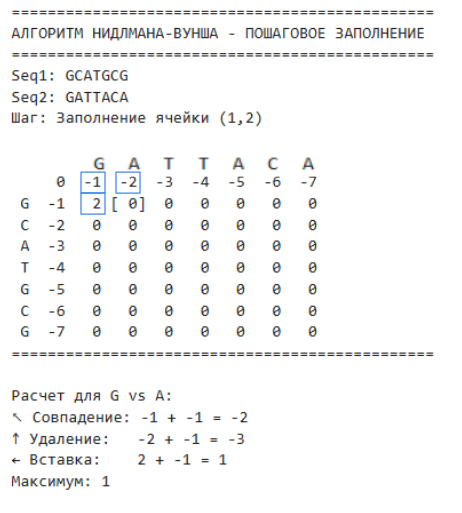

In [3]:
# 2. Объясните порядок движения при обратном проходе

"""
Отвечала на паре
"""

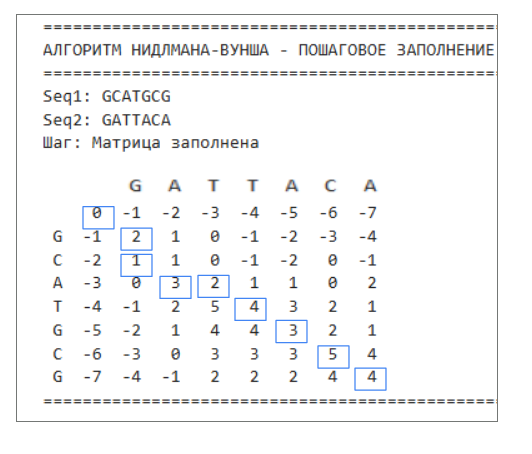

In [1]:
# Создание матрицы: 

import numpy as np

# Создание матрицы 5x5 с числами от 1 до 25
matrix = np.arange(1, 26).reshape(5, 5)
print("Исходная матрица:")
print(matrix)

Исходная матрица:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


In [2]:
# Задание 3: Элемент сверху для каждой ячейки

# Напишите код, который для каждой  ячейки матрицы выведет элемент,
# находящийся непосредственно над ней (сверху).
# Начинайте с элемента (1,1) и двигайтесь последовательно по строкам, пропуская элементы в нулевой строке и в нулевом столбце 

# Требования:

#     Для каждой ячейки выводите ее координаты

#     Выводите элемент сверху



# Пример вывода для первых нескольких ячеек:

# Ячейка (2,1) = 6 → Сверху: 1
# Ячейка (2,2) = 7 → Сверху: 2

for i in range(1, matrix.shape[0]): # строки
    for j in range(1, matrix.shape[1]): # столбцы
        current = matrix[i, j]
        top = matrix[i-1, j]
        print(f"Ячейка ({i+1},{j+1}) = {current} → Сверху: {top}")


Ячейка (2,2) = 7 → Сверху: 2
Ячейка (2,3) = 8 → Сверху: 3
Ячейка (2,4) = 9 → Сверху: 4
Ячейка (2,5) = 10 → Сверху: 5
Ячейка (3,2) = 12 → Сверху: 7
Ячейка (3,3) = 13 → Сверху: 8
Ячейка (3,4) = 14 → Сверху: 9
Ячейка (3,5) = 15 → Сверху: 10
Ячейка (4,2) = 17 → Сверху: 12
Ячейка (4,3) = 18 → Сверху: 13
Ячейка (4,4) = 19 → Сверху: 14
Ячейка (4,5) = 20 → Сверху: 15
Ячейка (5,2) = 22 → Сверху: 17
Ячейка (5,3) = 23 → Сверху: 18
Ячейка (5,4) = 24 → Сверху: 19
Ячейка (5,5) = 25 → Сверху: 20


In [3]:
# Задание 2: Элемент по диагонали (левый верхний) для каждой ячейки

# Задача: Напишите код, который для каждой ячейки матрицы выведет элемент, находящийся по диагонали слева сверху.
# Начинайте с элемента (1,1)

# Требования:

#     Для каждой ячейки выводите ее координаты и значение

#     Выводите диагональный элемент, если он существует

#     Если диагонального элемента не существует (для первой строки или первого столбца), выводите соответствующее сообщение

for i in range(matrix.shape[0]): # строки
    for j in range(matrix.shape[1]): # столбцы
        current = matrix[i, j]
        if i > 0 and j > 0:
            diag = matrix[i-1, j-1]
            print(f"Ячейка ({i+1},{j+1}) = {current} → Диагональ: {diag}")
        else:
            print(f"Ячейка ({i+1},{j+1}) = {current} → Диагонали нет")


Ячейка (1,1) = 1 → Диагонали нет
Ячейка (1,2) = 2 → Диагонали нет
Ячейка (1,3) = 3 → Диагонали нет
Ячейка (1,4) = 4 → Диагонали нет
Ячейка (1,5) = 5 → Диагонали нет
Ячейка (2,1) = 6 → Диагонали нет
Ячейка (2,2) = 7 → Диагональ: 1
Ячейка (2,3) = 8 → Диагональ: 2
Ячейка (2,4) = 9 → Диагональ: 3
Ячейка (2,5) = 10 → Диагональ: 4
Ячейка (3,1) = 11 → Диагонали нет
Ячейка (3,2) = 12 → Диагональ: 6
Ячейка (3,3) = 13 → Диагональ: 7
Ячейка (3,4) = 14 → Диагональ: 8
Ячейка (3,5) = 15 → Диагональ: 9
Ячейка (4,1) = 16 → Диагонали нет
Ячейка (4,2) = 17 → Диагональ: 11
Ячейка (4,3) = 18 → Диагональ: 12
Ячейка (4,4) = 19 → Диагональ: 13
Ячейка (4,5) = 20 → Диагональ: 14
Ячейка (5,1) = 21 → Диагонали нет
Ячейка (5,2) = 22 → Диагональ: 16
Ячейка (5,3) = 23 → Диагональ: 17
Ячейка (5,4) = 24 → Диагональ: 18
Ячейка (5,5) = 25 → Диагональ: 19


In [4]:
# Задание 3: Элемент слева для каждой ячейки

# Задача: Напишите код, который для каждой  ячейки матрицы выведет элемент, находящийся непосредственно слева.

# Начинайте с элемента (1,1)

# Требования:

#     Для каждой ячейки выводите ее координаты и значение

#     Выводите левый элемент

for i in range(matrix.shape[0]): # строки
    for j in range(matrix.shape[1]): # столбцы
        current = matrix[i, j]
        if j > 0:
            left = matrix[i, j-1]
            print(f"Ячейка ({i+1},{j+1}) = {current} → Слева: {left}")
        else:
            print(f"Ячейка ({i+1},{j+1}) = {current} → Слева нет")


Ячейка (1,1) = 1 → Слева нет
Ячейка (1,2) = 2 → Слева: 1
Ячейка (1,3) = 3 → Слева: 2
Ячейка (1,4) = 4 → Слева: 3
Ячейка (1,5) = 5 → Слева: 4
Ячейка (2,1) = 6 → Слева нет
Ячейка (2,2) = 7 → Слева: 6
Ячейка (2,3) = 8 → Слева: 7
Ячейка (2,4) = 9 → Слева: 8
Ячейка (2,5) = 10 → Слева: 9
Ячейка (3,1) = 11 → Слева нет
Ячейка (3,2) = 12 → Слева: 11
Ячейка (3,3) = 13 → Слева: 12
Ячейка (3,4) = 14 → Слева: 13
Ячейка (3,5) = 15 → Слева: 14
Ячейка (4,1) = 16 → Слева нет
Ячейка (4,2) = 17 → Слева: 16
Ячейка (4,3) = 18 → Слева: 17
Ячейка (4,4) = 19 → Слева: 18
Ячейка (4,5) = 20 → Слева: 19
Ячейка (5,1) = 21 → Слева нет
Ячейка (5,2) = 22 → Слева: 21
Ячейка (5,3) = 23 → Слева: 22
Ячейка (5,4) = 24 → Слева: 23
Ячейка (5,5) = 25 → Слева: 24


# Часть 2

In [6]:
# 1. NumPy: создайте матрицу от 1 до 9

matrix = np.arange(1, 10).reshape(3, 3)
print(matrix)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
# 2. NumPy: создайте матрицу от 9 до 1

matrix = np.arange(9, 0, -1).reshape(3, 3)
print(matrix)

[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [8]:
# 3. NumPy: транспонируйте матрицу

transposed = matrix.T
print(transposed)

[[9 6 3]
 [8 5 2]
 [7 4 1]]


In [9]:
# 4. NumPy: создайте 2 матрицы и сложите их

A = np.arange(1, 10).reshape(3, 3)
B = np.arange(9, 0, -1).reshape(3, 3)
C = A + B
print(C)

[[10 10 10]
 [10 10 10]
 [10 10 10]]


In [10]:
# 5. NumPy: создайте 2 матрицы и перемножьте их

C = np.dot(A, B)
print(C)

[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


In [11]:
# 6. Используя NumPy создайте единичную матрицу (по главной диагонали единицы)

# [[1. 0. 0.]
#  [0. 1. 0.]
#  [0. 0. 1.]]

matrix = np.eye(3)
print(matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Домашнее задание

In [23]:
# 1. Вам представлен код с реализацией алгоритма Нидлмана-Вунша. Функция needleman_wunsch принимает параметры: match=2, mismatch=-1, gap=-1
# поэксперементируйте с параметрами и посморите, как меняется выравнивание и score. Какие выводы можно сделать? 
"""
При match=2, mismatch=-1, gap=-1 --> общий score=4
Выравнивание 1: GCA-TGCG
Выравнивание 2: G-ATTACA

При match=2, mismatch=-2, gap=-1 --> общий score=2 
Выравнивание 1: GCA-TGCG
Выравнивание 2: G-ATTACA

При match=4, mismatch=-2, gap=-1 --> общий score=12 
Выравнивание 1: GCA-TGCG
Выравнивание 2: G-ATTACA

При match=2, mismatch=-1, gap=0 --> общий score=8 
Выравнивание 1: GCA-T-GC-G
Выравнивание 2: G-ATTA-CA-

Я попробовала поменять каждый из параметров, да, score менялся, но я предполагаю что это просто из-за изменения параметров, 
само выравнивание поменялось лишь в последнем варианте, когда я поменяла gap. У нас получилось больше гэпов, 
выравнивание "порвалось" на блоки, может быть полезно в случае когда мы такое правда ожидаем биологически.
"""

In [13]:
# 2. Используя numpy создайте матрицу 7 на 7

matrix = np.random.randint(0, 100, (7, 7))
print(matrix)

[[54 85 60 60 20 70 72]
 [86 77 45 16 47 84 42]
 [49 47 11 33 39 77 21]
 [76  0 95 42 24  7 35]
 [29 58 95 21 20 31 91]
 [33 67 88  3 43 43 51]
 [85 20 37 72 58 66  5]]


In [15]:
# 3. NumPy: создайтие диагональную матрицу, где по главной диагонали идут числа от 1 до 5

matrix = np.diag(np.arange(1, 6))
print(matrix)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [18]:
# 4. Напиши функцию, которая принимает матрицу и проверяет, является ли она единичной. В ответе возвращается True или False

def is_identity_matrix(matrix):

# проверяем, что матрица не пустая и является списком списков
    if not isinstance(matrix, list) or not matrix or not isinstance(matrix[0], list):
        return False
    rows = len(matrix)
    cols = len(matrix[0])

# единичная матрица должна быть квадратной
    if rows != cols:
        return False

 # проверяем элементы матрицы
    for i in range(rows):
        for j in range(cols):
            if i == j: # элементы на главной диагонали
                if matrix[i][j] != 1:
                    return False
            else: # элементы вне главной диагонали
                if matrix[i][j] != 0:
                    return False
    return True

matrix = np.diag(np.arange(1, 6))
print(f"матрица: {is_identity_matrix(matrix)}")

матрица: False
